In [1]:
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import nltk #the Natural Language Toolkit
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

import pandas as pd
import pickle

import networkx as nx


C:\Users\Timot\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
soc_psych_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\soc_data\soc_psych_norm_filt_df.pk1')

cog_psych_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\psych_data\cog_psych_sents_norm_filt_df.pk1') 


In [3]:
soc_cog_df = cog_psych_df

In [4]:
full_df = soc_cog_df.append(soc_psych_df)

In [5]:
#transform into vectors array
#First it needs to be initialized
CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
Vects = CountVectorizer.fit_transform(full_df['contents'])
print(Vects.shape)

(464, 31384)


In [6]:
#TF-IDF weighting

#initialize
TFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(Vects)
#train
TF = TFTransformer.transform(Vects)
print(TF.shape)

(464, 31384)


In [7]:
#gives the tf-idf for each word in each text
list(zip(CountVectorizer.vocabulary_.keys(), TF.data))[:20]

[('one', 0.01803774873073828),
 ('of', 0.24426681405507228),
 ('the', 0.5496003316239126),
 ('core', 0.0017763303666264694),
 ('problems', 0.001297436192548241),
 ('in', 0.14536530510342616),
 ('learning', 0.09360409403627959),
 ('is', 0.06504931461249207),
 ('determining', 0.0018488134186518995),
 ('range', 0.0054959476505158705),
 ('tasks', 0.009691379572860225),
 ('and', 0.10952180521491013),
 ('circumstances', 0.003803886495954648),
 ('that', 0.11416818483008813),
 ('training', 0.15357769267820798),
 ('paradigm', 0.011196330772355777),
 ('will', 0.018961772822074185),
 ('impact', 0.005655168689612764),
 ('can', 0.010439097104908406),
 ('produce', 0.006458486792981201)]

In [8]:
#reduces array to words with 3 occurneces
#initialize
fullTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
fullTFVects = fullTFVectorizer.fit_transform(full_df['contents'])

In [9]:
fullTFVects.shape

(464, 1000)

In [10]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = matplotlib.cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))
    

In [11]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(fullTFVects.toarray())
reduced_data = pca.transform(fullTFVects.toarray())

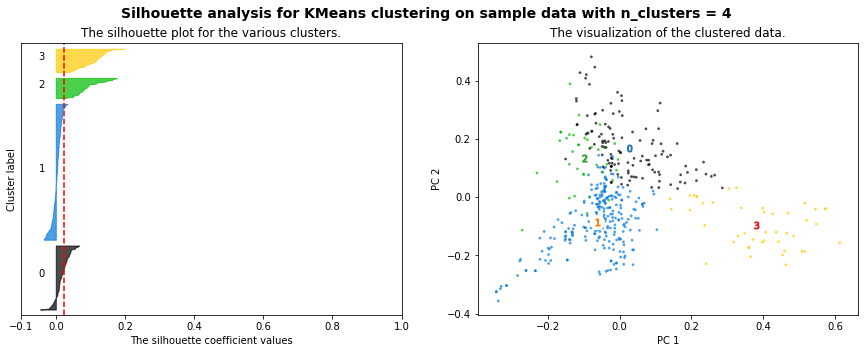

For n_clusters = 4, The average silhouette_score is : 0.024


In [12]:
X = fullTFVects.toarray()
plotSilhouette(4, X)

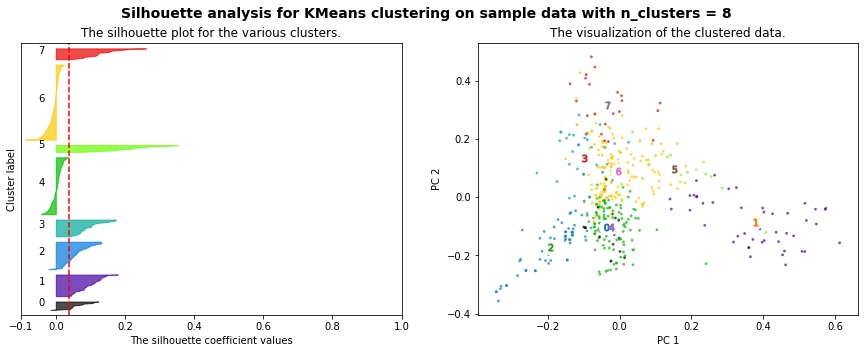

For n_clusters = 8, The average silhouette_score is : 0.037


In [13]:
X = fullTFVects.toarray()
plotSilhouette(8, X)

In [14]:
full_4_KM = sklearn.cluster.KMeans(n_clusters = 4, init='k-means++')
full_4_KM.fit(fullTFVects)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
fullPCA = sklearn.decomposition.PCA(n_components = 2).fit(fullTFVects.toarray())
reducedPCA_data = fullPCA.transform(fullTFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, 4)))
colors_p = [colors[l] for l in full_4_KM.labels_]

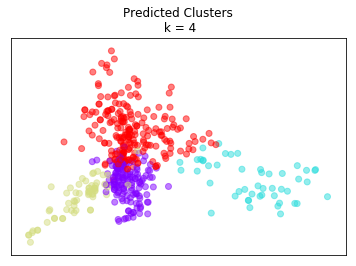

In [18]:
fig = plt.figure(1)


plt.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(4))
plt.show()
fig.savefig(r'C:\Users\Timot\Documents\cluster.jpeg')

In [ ]:
#topic modeling with gensim 
#create dctionary with tokens
#Apply our functions
full_df['normalized_tokens'] = full_df['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x, 
                                                                                                                            stopwordLst = lucem_illud.stop_words_basic, 
                                                                                                                            stemmer = lucem_illud.stemmer_basic))
full_df[::100]

In [17]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

full_df['reduced_tokens'] = full_df['normalized_tokens'].apply(lambda x: dropMissing(x, fullTFVectorizer.vocabulary_.keys()))

In [97]:
dictionary = gensim.corpora.Dictionary(full_df['reduced_tokens'])

In [98]:
corpus = [dictionary.doc2bow(text) for text in full_df['reduced_tokens']]

In [100]:
gensim.corpora.MmCorpus.serialize('soc_cog.mm', corpus)
fullmm = gensim.corpora.MmCorpus('soc_cog.mm')

In [104]:
senlda = gensim.models.ldamodel.LdaModel(corpus=fullmm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [108]:
sen1Bow = dictionary.doc2bow(full_df['reduced_tokens'][0])
sen1lda = senlda[sen1Bow]
print("The topics of the text: {}".format(full_df['titles'][0]))
print("are: {}".format(sen1lda))

TypeError: decoding to str: need a bytes-like object, list found

# Networks
Making a network from the cog_psych dataframe

In [57]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [58]:
g = wordCooccurrence(cog_psych_df['normalized_sents'].sum())

In [19]:
soc_psych_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\soc_data\soc_psych_norm_filt_df.pk1')

cog_psych_df = pd.read_pickle(r'C:\Users\Timot\Documents\final_project\psych_data\cog_psych_sents_norm_filt_df.pk1') 


In [20]:
def tokenize(text):
    tokenlist = nltk.word_tokenize(text)
    normalized = lucem_illud.normalizeTokens(tokenlist, stopwordLst = lucem_illud.stop_words_basic, stemmer = lucem_illud.stemmer_basic)
    return normalized

In [21]:
cogVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
cogVects_incidence = cogVectorizer.fit_transform(cog_psych_df['contents'])

In [24]:
cogVects_incidence.shape

(178, 11523)

In [25]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((cogVectorizer.get_feature_names()[i] for i in range(cogVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(cogVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, cogVectorizer.get_feature_names()[w], {'weight' : cogVects_incidence[d, w]}) for d, w in zip(*cogVects_incidence.nonzero())))

In [26]:
print(nx.info(g_2mode))

Name: 
Type: Graph
Number of nodes: 11701
Number of edges: 120457
Average degree:  20.5892


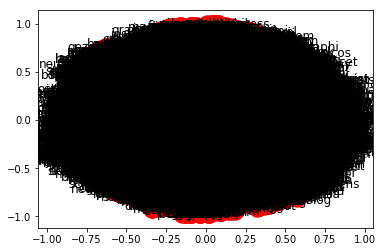

In [27]:
nx.draw_networkx(g_2mode)

In [28]:
#for creating a two-mode network, for words to be connected 
#connected to other words or document to other documents via 
#the words they share
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [29]:
gDoc = contractNetwork(g_2mode, 'doc')

In [30]:
#document to document network 
print(nx.info(gDoc))

Name: 
Type: Graph
Number of nodes: 178
Number of edges: 15753
Average degree: 177.0000


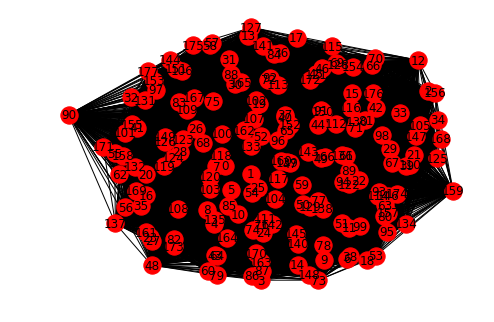

In [31]:
#visualizes the network
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}) #Getting labels is a bit annoying

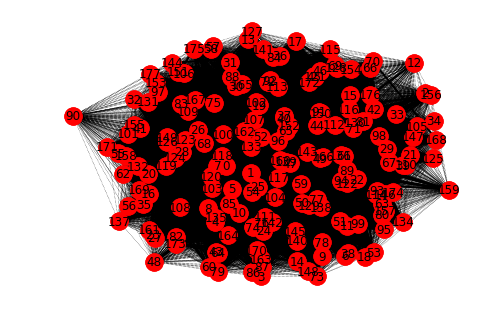

In [32]:
#high and low weight edges distinguished 
wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, labels = {n:n for n in gDoc.nodes()}, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=2)

In [33]:
#creates word to word network by documents 
gWord = contractNetwork(g_2mode, 'word')
print(nx.info(gWord))

Name: 
Type: Graph
Number of nodes: 11523
Number of edges: 11199136
Average degree: 1943.7882


In [68]:
#reduces the number of words to managable size
wMean = np.mean([d['weight'] for n1, n2, d in gWord.edges(data = True)])
wMean

3.8451999332805675

In [69]:
#sentence cooccurence graph after dropping all edges with 
#low weight 
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 100])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(nx.connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 1
Number of edges: 1
Average degree:   2.0000


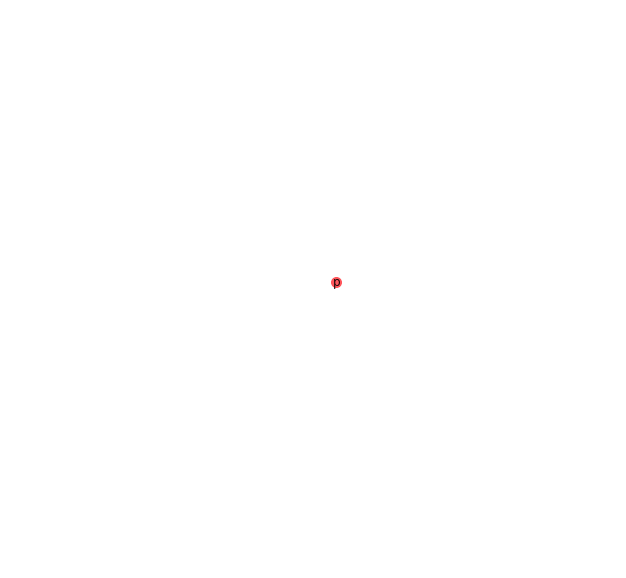

In [67]:
#visualizes
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [46]:
#I think this will help to find the nodes which connect with 
#mechan 
nx.clique.number_of_cliques(giant)['mechanism']

KeyError: 'mechanism'

In [ ]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

In [ ]:
#creates subgraph of the network, those nodes witin 1 or two 
#network steps of 'mechanism'
mechanismNeighbors = giant.neighbors('mechanism')
g_mechanism = giant.subgraph(mechanismNeighbors)
print(nx.info(g_mechanism))

In [ ]:
#visualizes
layout_amer = nx.spring_layout(g_american, weight='weight', iterations= 100, k = .3)
fig, ax = plt.subplots(figsize = (10,10))
maxWeight = max((d['weight'] for n1, n2, d in g_american.edges(data = True)))
minWeight = min((d['weight'] for n1, n2, d in g_american.edges(data = True)))
nx.draw(g_american, ax = ax, pos = layout_amer, labels = {n:n for n in g_american.nodes()},
        width=[(d['weight'] - minWeight + .7) / maxWeight for n1, n2, d in g_american.edges(data = True)], 
        alpha = .9, 
        font_size = 16,
        font_color = 'xkcd:dark grey',
        edge_color = 'xkcd:sky blue',
        cmap = plt.get_cmap('plasma')) 